# 11.Skl_Perceptron

Total Test number : 45, Error number : 15
Accuracy: 0.67


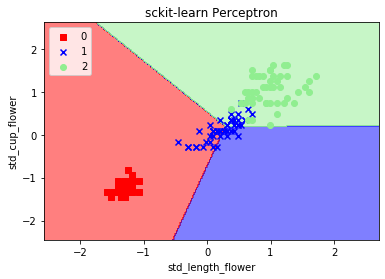

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import style
from plotdregion import plot_decision_region

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    ml.fit(X_train_std, y_train)
    y_pred = ml.predict(X_test_std)
    print('Total Test number : %d, Error number : %d' %(len(y_test), (y_test != y_pred).sum()))
    print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title='sckit-learn Perceptron')